# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [7]:
# Extract all rows of data
table = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
data_headers = []
data_rows = []

row_headers = table.find('tr')
headers = row_headers.find_all('th')

row_data = table.find_all('tr', class_='data-row')

# Loop through the scraped data to create a list of rows
for item in headers:
    data_headers.append(item.text.strip())

for row in row_data:
    td_elements = row.find_all('td')
    row_data = [td.text.strip() for td in td_elements]
    data_rows.append(row_data)

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data_rows, columns=data_headers)

In [11]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [13]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [14]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [18]:
# 1. How many months are there on Mars?
print(f"In Mars, there are {mars_df['month'].nunique()} months in a year.")

In Mars, there are 12 months in a year.


In [19]:
# 2. How many sols (Martian days) worth of data are there?
print(f"There are {mars_df['sol'].nunique()} sols (Martian day) worth of data in the given database.")

There are 1867 sols (Martian day) worth of data in the given database.


In [26]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
print(avg_min_temp_by_month)
avg_min_temp_by_month = avg_min_temp_by_month.reset_index()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


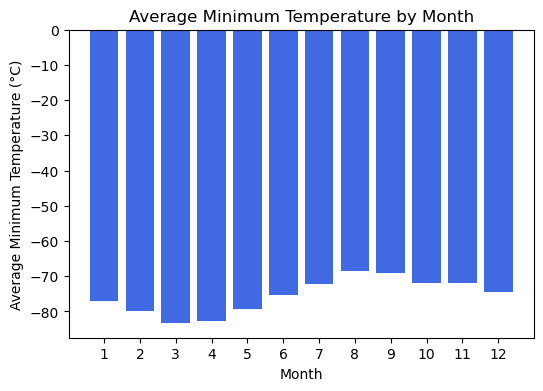

In [35]:
# Plot the average minimum temperature by month
plt.figure(figsize=(6,4))
plt.bar(avg_min_temp_by_month['month'], avg_min_temp_by_month['min_temp'], color='royalblue')

# Add axis labels and title
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(avg_min_temp_by_month['month'])
plt.show()

The coldest month recorded at Curiosity's location was month #3 with an average temperature of -83.31°C
The hottest month recorded at Curiosity's location was month #8 with an average temperature of -68.38°C


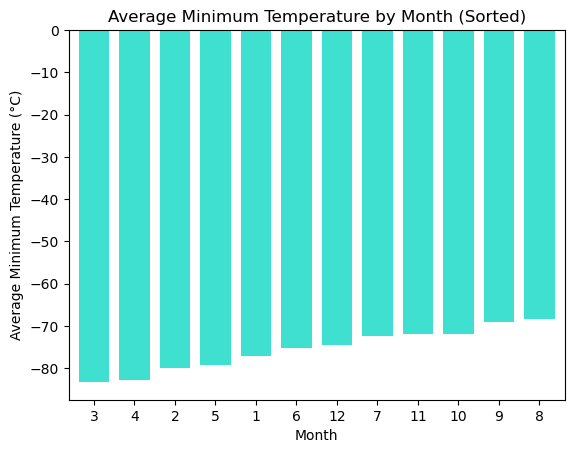

In [36]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

temp_sorted = avg_min_temp_by_month.sort_values(by='min_temp', ascending=True)


print(f"The coldest month recorded at Curiosity's location was month #\
{temp_sorted['month'].iloc[0]} with an average temperature of {temp_sorted['min_temp'].min():.2f}°C")
print(f"The hottest month recorded at Curiosity's location was month #\
{temp_sorted['month'].iloc[-1]} with an average temperature of {temp_sorted['min_temp'].max():.2f}°C")


temp_sorted.plot.bar(x='month', y='min_temp', rot=0, legend=False, color='turquoise', width=0.75)

# Add title and labels
plt.title('Average Minimum Temperature by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.show()

In [33]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
print(avg_pressure_by_month)
avg_pressure_by_month = avg_pressure_by_month.reset_index()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


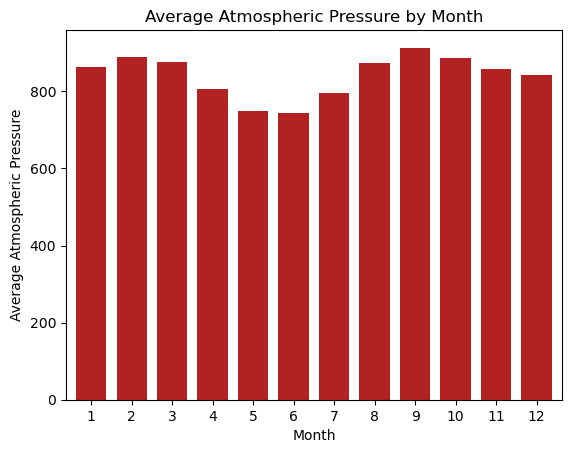

In [37]:
# Plot the average pressure by month
avg_pressure_by_month.plot.bar(x='month', y='pressure', rot=0, legend=False, color='firebrick', width=0.75)
plt.title('Average Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (atm)')
plt.show()

The lowest average atmospheric pressure recorded at Curiosity's location was 745.0544 during month #6.
The highest average atmospheric pressure recorded at Curiosity's location was 913.3060 during month #9.


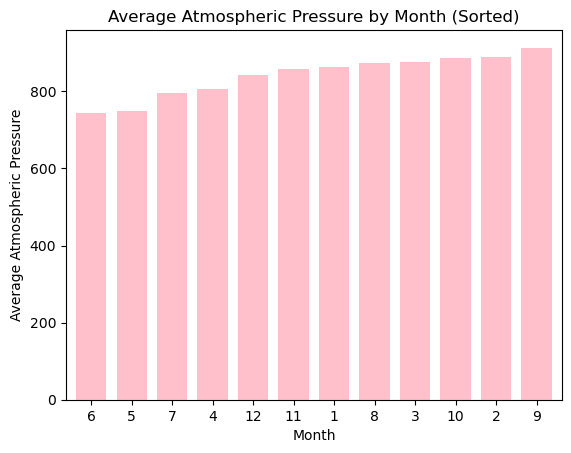

In [39]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
press_sorted = avg_pressure_by_month.sort_values(by='pressure', ascending=True)

# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
print(f"The lowest average atmospheric pressure recorded at Curiosity's location was \
{press_sorted['pressure'].min():.4f} atm during month #{press_sorted['month'].iloc[0]}.")
print(f"The highest average atmospheric pressure recorded at Curiosity's location was \
{press_sorted['pressure'].max():.4f} atm during month #{press_sorted['month'].iloc[-1]}.")


# plot the newly-sorted data sorted by pressure
press_sorted.plot.bar(x='month', y='pressure', rot=0, legend=False, color='pink', width=0.75)

# Add title and labels
plt.title('Average Atmospheric Pressure by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (atm)')
plt.show()

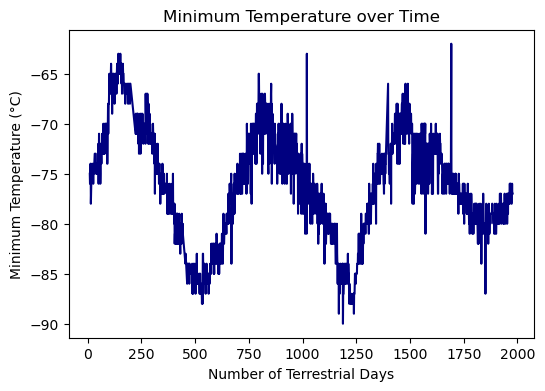

In [41]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.set.

# Plot the data as a bar chart
plt.figure(figsize=(6,4))
plt.plot(mars_df['sol'], mars_df['min_temp'], color='navy')

# Add titles and labels
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')

# Show the plot
plt.show()

#### Minimum Temperature

Based on the given database, the coldest month recorded at Curiosity's location was during the third month of Mars with an average temperature of -83.31°C.
On the other side of the spectrum, the hottest month recorded at Curiosity's location was the eighth month on Mars, with an average temperature of -68.38°C (if you can call that hot).

#### Atmospheric Pressure

According to the given dataset, the lowest average atmospheric pressure recorded at Curiosity's location was 745.0544 in the sixth month of Mars.
Meanwhile, the highest average atmospheric pressure recorded at Curiosity's location was 913.3060 during the ninth month of Mars.

#### Year Length

Examining the minimum temperature over time graph, the seasonal changes should resemble the curve of a sine graph. Using the starting minimum temperature at around -75.5°C, a full seasonal cycle should reach the same temperature three times. Given the line graph, I would estimate that a full Martian year is completed after 700 terrestrial days. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [42]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=False)

In [43]:
browser.quit()